In [31]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
#Import Libraries
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings("ignore")
import statsmodels.api as sm
import statistics
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

### Problem-1. Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

[Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]


### Problem-1 -A 

In [32]:
df_Salary = pd.read_csv('SalaryData.csv')

In [33]:
df_Salary.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [34]:
df_Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [35]:
df_Salary.describe()

,Salary
count,40.00
mean,162186.88
std,64860.41
min,50103.00
25%,99897.50
50%,169100.00
75%,214440.75
max,260151.00


In [36]:
df_Salary['Education'] = pd.Categorical(df_Salary['Education'])
df_Salary['Occupation'] = pd.Categorical(df_Salary['Occupation'])


In [37]:
df_Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 824.0 bytes


###              1.1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

###               Hypothesis for conducting one-way ANOVA for Education Level as a Factor

#### Null hypothesis  H0 :  The mean Salary received is same across different Education levels i.e. Doctorate, Bachelors and HS-grad
#### Alternate hypothesis Ha : The mean Salary received is different in at-least one category of Education than others where Education category as  provided in data set are ' Doctorate', ' Bachelors'  and ' HS-grad'

###               Hypothesis for conducting one-way ANOVA for Occupation Level as a Factor

#### Null hypothesis  H0 :  The mean Salary received is same across different Occupation levels ' Adm-clerical', ' Sales', ' Prof-specialty' and ' Exec-managerial'
#### Alternate hypothesis Ha : The mean Salary received is different in at-least one category of Occupation levels  which are ' Adm-clerical', ' Sales', ' Prof-specialty' and ' Exec-managerial'

###              1.2  Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [38]:
formula = 'Salary ~ Education'
model =  ols(formula,df_Salary).fit()
aov_table = anova_lm(model)
print(aov_table)

             df          sum_sq        mean_sq     F  PR(>F)
Education  2.00 102695466735.89 51347733367.94 30.96    0.00
Residual  37.00  61372559274.49  1658717818.23   nan     nan


In [39]:
import scipy.stats as stats
stats.f.ppf(q=.95,dfn=2, dfd=37) #F-critical

3.251923846387207

#### Since the p-value (0.00 ) is less than the level of significance(0.05), we reject the null hypothesis and conclude 
#### that there is a difference in the mean salary received by the education levels by atleast one level of Education. 
#### Mean Salary paid to Education levels ' Doctorate', ' Bachelors' and ' HS-grad' varies.
#### The decision is again supported by the F Value  of (30.96) which is fairly high as well the F-Critical Value of 3.251923846387207



###              1.3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [40]:
formula = 'Salary ~ Occupation'
model = ols(formula,df_Salary).fit()
aov_table = anova_lm(model)
print(aov_table)

              df          sum_sq       mean_sq    F  PR(>F)
Occupation  3.00  11258782926.47 3752927642.16 0.88    0.46
Residual   36.00 152809243083.91 4244701196.78  nan     nan


In [41]:
import scipy.stats as stats
stats.f.ppf(q=.95,dfn=3, dfd=36) #F-critical

2.86626555094018

#### Since the p-value (0.46 ) is Greater than the level of significance(0.05), we fail to reject the null hypothesis and conclude 
#### that there is no a difference in the mean salary received by any one of the Occupations. 
#### Mean Salary paid to Occupations ' Adm-clerical', ' Sales', ' Prof-specialty' and ' Exec-managerial' remains same.
#### The decision is again supported by the F Value  of (0.88) which is fairly low as well the F-Critical Value of 2.86626555094018

###             1.4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

#### We Performed a one-way ANOVA on Salary with respect to Education(Question 1.2). The null hypothesis is REJECTED based on the ANOVA results. Data shows that the mean salary to " HS-GRAD"  differs significantly



### Problem-1 -B

#### 1.5. The Student News Service at Clear Mountain State University (CMSU) has decided to gather What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

[hint: use the ‘pointplot’ function from the ‘seaborn’ function]


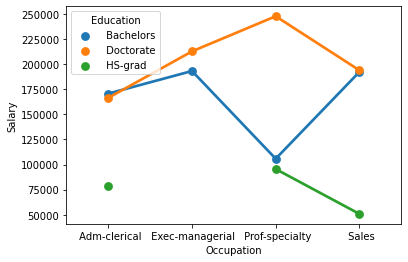

In [42]:
sns.pointplot(x='Occupation', y='Salary', data=df_Salary, hue='Education',ci=None);

In [43]:
formula = 'Salary ~  C(Education):C(Occupation)'
model = ols(formula, df_Salary).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education):C(Occupation),11.00,143801936828.37,13072903348.03,18.38,0.00
Residual,29.00,20621020503.03,711069672.52,nan,nan


### Point chart as well as P=Value of variance analysis shows a really high degree of interaction between Education and Occupation impacting the Salary. 
### 'HS-Grad' at every occupation earn less than 'Doctorate' or 'Bachelors'.
### 'Doctorate' at every occupation earn More than 'HS-Grad' or 'Bachelors'.
### 'Bachelors' at every occupation earn More than 'HS-Grad'.
### There is no evidence that The Salaries are independent of combination of 'Education' and 'Occupation'.

### 1.6. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?


###               Hypothesis for conducting Two-way ANOVA for Education Level as a Factor / Treatment

   #### Null hypothesis  H0 :  The mean Salary received is same across different Education levels i.e. Doctorate, Bachelors and HS-grad
   #### Alternate hypothesis Ha : The mean Salary received is different in at-least one category of Education than others where Education category as  provided in data set are ' Doctorate', ' Bachelors'  and ' HS-grad'
    

###               Hypothesis for conducting Two-way ANOVA for Occupation Level as a Factor / Treatment

   #### Null hypothesis  H0 :  The mean Salary received is same across different Occupation levels ' Adm-clerical', ' Sales', ' Prof-specialty' and ' Exec-managerial'
   #### Alternate hypothesis Ha : The mean Salary received is different in at-least one category of Occupation levels  which are ' Adm-clerical', ' Sales', ' Prof-specialty' and ' Exec-managerial'
   
   
 ###               Hypothesis for conducting Two-way ANOVA for Interaction between  Factors Education and Occupation to understand impact on Salary

   #### Null hypothesis  H0 :  There is no impact of Interaction between factors Education and Occupation on Salary
   #### Alternate hypothesis Ha : There is  impact of Interaction between factors Education and Occupation on Salary


In [44]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df_Salary).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.00,102695466735.89,51347733367.94,72.21,0.00
C(Occupation),3.00,5519946053.36,1839982017.79,2.59,0.07
C(Education):C(Occupation),6.00,36349090964.89,6058181827.48,8.52,0.00
Residual,29.00,20621020503.03,711069672.52,nan,nan


### A 2-Way ANOVA was run on a sample of 40 individuals to examine the effect of Education and Occupation on Salary.  There was a significant interaction as the P-Value of 0.00 < 0.05 between the effects of Education and Occupation on Salary. Simple main effects analysis showed that Occupation has no significant effect on Salary as the P-Value of 0.07 > 0.05 , but the treatment level(Education) has significant effect on Salary as the P-Value of 0.00 < 0.05

### 1.7. Explain the business implications of performing ANOVA for this particular case study.

one way anova is used to determine if there is any statistically significant  
differences between means of two or more independent (Unrelated) groups. Ideally minumum 3.
In current situation for Education levels when we perfomed this analysis it revealed that that there 
is difference in the mean of Salary received by Education levels 'Doctorate', 'Bachelors' and 'HS-grad'.
This outcome of test is logically correct as it is expected that Salaries will vary for staff with varied Education levels.

one way anova is used to determine if there is any statistically significant  
differences between means of two or more independent (Unrelated) groups. Ideally minumum 3.
In current situation for Occupation levels when we perfomed this analysis it revealed that that there 
is No difference in the mean of Salary received by Occupation levels 'Adm-clerical', 'Exec-managerial','Prof-specialty' and 'Sales'.
This outcome of test is logically correct as it is expected that Salaries Spend will be similarfor staff employeed with different Departments.
IN order to strengthen each of the department Equally.


Two Way is extension of One way ANOVA that examines the influence of two different categorical independent variables on
one continous dependent variable.
A 2-Way ANOVA was run on a sample of 40 individuals to examine the effect of Education and Occupation on Salary.  
1) Simple main effects analysis showed that Occupation has no significant effect on Salary as the P-Value 
of 0.07 > 0.05; which is logically correct as Each occupation has staff with varied Education background and they are paid
differently summing up to similar payout per occupation.

2) There was a significant interaction as the P-Value of 0.00 < 0.05 between the effects of Education and Occupation 
on Salary. This is logically correct since the Education levels within same occupation are paid differently.

3) Treatment level(Education) has significant effect on Salary as the P-Value of 0.00 < 0.05.
This is logically correct since the Education levels within same occupation are expected to be paid differently.